<h1 style="font-size:2rem;color:black;"> Cow Transportation Problem</h1>

<h2 style="font-size:rem;color:black;"> Problem Description</h2>

A colony of super-intelligent alien bioengineers just landed on Earth to create new species. Their experiments on cows succeeded and they need to transport cows to their planet. However, their spaceship has a LIMIT weight and they need to minimize the number of trips due to high gas prices.

<div style="text-align: center;">
    <img src="Img/space_cows.jpg" 
     width="400" 
     height="500"/>
     </div>

<h2 style="font-size:rem;color:black;"> Import and Configuration</h2>

In [2]:
from py.ps1_partition import get_partitions
import timeit
import matplotlib.pyplot as plt
from random import randint

<h2 style="font-size:rem;color:black;"> Data preparation</h2>

Reading the given data. Assumes the cow name and weight pairs comma-separated, returns a dictionary containing names as keys and weights as values. Note that duplicate names can not be used.

In [3]:
def load_cows(filename):
    cow_data = {}
    with open(filename, "r") as data:
        for i in data:
            name, weight = i.strip().split(",")
            cow_data[name] = int(weight)
    return cow_data

In [4]:
cow_data_1 = load_cows("Data/ps1_cow_data.txt")
cow_data_2 = load_cows("Data/ps1_cow_data_2.txt")
cow_data_even = load_cows("Data/ps1_cow_data_even.txt")

<h2 style="font-size:rem;color:black;"> Algorithms</h2>

<h3 style="font-size:rem;color:black;"> Greedy Algorithm</h3>

The first algorithm to solve this optimization problem is Greedy Algorithm. It picks the heaviest cow first and then tries to fill the remaining limit with a suitable cow. To use Greedy, first data must be sorted by descending order.

In [5]:
def greedy_cow_transport(cows, limit=10):
    #Sort the cows in descending order
    sorted_cows = sorted(cows.items(), key=lambda x: x[1], reverse=True)
    trips = []
    #Loop through the sorted_cows. Add the first cow in the sorted_cows list and iterate through the list until find a cow where the trip weight does not exceed the limit.
    while sorted_cows:
        trip = []
        trip_weight = 0
        i = 0
        while i < len(sorted_cows):
            cow, weight = sorted_cows[i]
            if trip_weight + weight <= limit:
                trip.append(cow)
                trip_weight += weight
                del sorted_cows[i]
            else:
                i += 1
        trips.append(trip)
    return trips

<h3 style="font-size:rem;color:black;"> Brute Force Algorithm</h3>

In Brute Force Algorithm all of the subsets are created by using partition functions. By looping through all possible partitions considering both limit and keeping the number of trips minimum optimal solution will be found. However, for large data calculation power needed for the Brute Force approach makes it unfeasible. 

In [6]:
def brute_force_cow_transport(cows, limit=10):
    best_partition = None
    min_trips = float('inf')
    for partition in get_partitions(cows):
        if all(sum(cows[name] for name in trip) <= limit for trip in partition):
            if len(partition) < min_trips:
                best_partition = partition
                min_trips = len(partition)
    return best_partition

<h2 style="font-size:rem;color:black;"> Comparing Algorithms</h2>

<h3 style="font-size:rem;color:black;"> Speed Comparison</h3>


Let's start comparing the speeds for the given data:

For data_1 (10 cows):

In [7]:
time_greedy = timeit.timeit(lambda: greedy_cow_transport(cow_data_1, 10), number=1) * 1000
time_brute_force = timeit.timeit(lambda: brute_force_cow_transport(cow_data_2, 10), number=1) * 1000

print("Greedy Algorithm Time (ms):", time_greedy)
print("Brute Force Algorithm Time (ms):", time_brute_force)

Greedy Algorithm Time (ms): 0.009400000000159281
Brute Force Algorithm Time (ms): 11.514000000000024


For data_2 (8 cows):

In [8]:
time_greedy = timeit.timeit(lambda: greedy_cow_transport(cow_data_2, 10), number=1) * 1000
time_brute_force = timeit.timeit(lambda: brute_force_cow_transport(cow_data_2, 10), number=1) * 1000

print("Greedy Algorithm Time (ms):", time_greedy)
print("Brute Force Algorithm Time (ms):", time_brute_force)

Greedy Algorithm Time (ms): 0.008699999999972619
Brute Force Algorithm Time (ms): 10.982700000000012


As expected Brute Force Algorithm is slower. If we want to see the speeds for growing dataset we can simply write:

In [9]:
results_greedy = []
results_brute_force = []
subset_cow_data = {}
a = len(list(cow_data_1.items()))
for num_cows in range(1, a + 1):
    # Limit the subset cow data to the current number of cows
        count = 0
        for key, value in cow_data_1.items():
            if count < num_cows:
                subset_cow_data[key] = value
                count += 1
        # Greedy algorithm
        time_greedy = timeit.timeit(lambda: greedy_cow_transport(subset_cow_data, 10), number=1) * 1000
        results_greedy.append(time_greedy)
        # Brute force algorithm
        time_brute_force = timeit.timeit(lambda: brute_force_cow_transport(subset_cow_data, 10), number=1) * 1000
        results_brute_force.append(time_brute_force)

Plot the results with matplotlib:

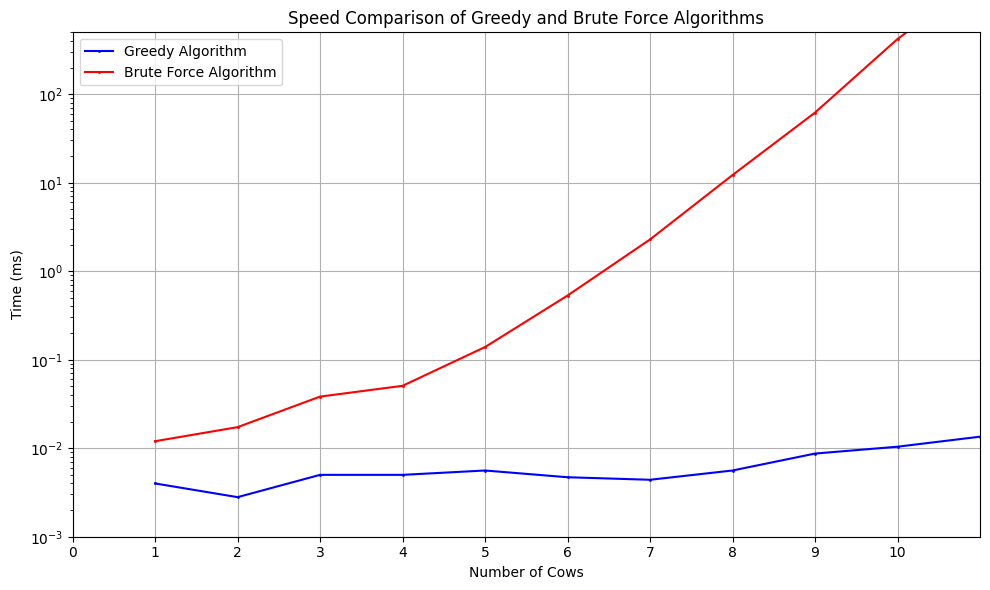

In [10]:
plt.figure(figsize=(10, 6))
num_cows = list(range(1, 12))
plt.plot(num_cows, results_greedy, marker='o', markersize=1, label='Greedy Algorithm', color='blue')
plt.plot(num_cows, results_brute_force, marker='s', markersize=1, label='Brute Force Algorithm', color='red')
plt.xlabel('Number of Cows')
plt.xlabel('Number of Cows')
plt.ylabel('Time (ms)')
plt.title('Speed Comparison of Greedy and Brute Force Algorithms')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 11, 1))
plt.ylim(0.001, 500)
plt.yscale('log')
plt.xlim(0, 11)
plt.tight_layout()
plt.show()

<h3 style="font-size:rem;color:black;"> Accuracy Comparison</h3>


If we compare the accuracy of the algorithms on the other hand:

In [11]:
print("Number of trips for data_1 using Greedy Algorithm is:", len(greedy_cow_transport(cow_data_1, 10)))

Number of trips for data_1 using Greedy Algorithm is: 6


In [12]:
print("Number of trips for data_1 using Brute Force Algorithm is:", len(brute_force_cow_transport(cow_data_1, 10)))

Number of trips for data_1 using Brute Force Algorithm is: 5


As can be seen, Brute Force Algorithm gives more optimal results. This is due to the nature of the algorithms. The Greedy Algorithm tries to push the heaviest cows first without considering the remaining cows. So in the end, there will be trips that are not full. In addition, if the data distributed evenly Greedy will give the optimal results since there wont be remaining voids to optimize. Lets check it for a evenly distrubuted data:

In [13]:
print("Number of trips for data_1 using Greedy Algorithm is:", len(greedy_cow_transport(cow_data_even, 10)))

Number of trips for data_1 using Greedy Algorithm is: 55


cow_data_even data has 10 of each weights(10 of 1t, 10 of 2t...10 of 10t).
Therefore, 10t cows, will be added to a single trip and the remaining 90 cows will transported with 45 trips. The total number of trips is 55 which is the optimal result. So we can say that if the data is evenly distributed or nearly evenly, the Greedy Algorithm also tends to give optimal results. Like in all problems, these problems show that we need to know the data before selecting an algorithm. For given data (which is only 10 cows) it is better to use the Brute Force algorithm. On the other hand, the Brute Force looks at the whole search space(without optimizing) and selects the optimal results. For a large dataset(more than 12 cows if we think realistically) since Brute Force's computation time grows exponentially it is not possible to use it. 

<h2 style="font-size:rem;color:black;"> Improved Algorithm</h2>

We discussed the problem and how we can improve the algorithms. Since it is a bit hard to optimize the accuracy of the Greedy Algorithm, we decided to increase the speed.

<h3 style="font-size:rem;color:black;"> Our Algorithm - Unsolvables v1</h3>

Our algorithm improves the Greedy Algorithm by processing and distributing the data before sorting. Firstly, stacks from 1 to limit are created inside our algorithm. When the cow is transferred into Unsolvables v1 it goes through some checks before sorting for Greedy Algorithm.
- Check for whether its weight is equal to the limit weight. If so, it is directly added to the trips.
- Check if limit - cow_weight stack is empty. If not pop the stack and add current_cow + popped cow to the trips.
- If the stack is empty then add the current_cow to its corresponding stack

After processing all the cows now we have trips that weigh exactly the limit tons and remaining stacks. Unsolvables v1 then add the remaining stacks to a list in descending order for Greedy Algorithm.

In [14]:
def unsolvables(cows, limit=10):
    stacks = {f'stack{i + 1}': [] for i in range(limit)}
    trips = []

    for cow, weight in cows.items():
        # Check if the cow's weight is equal to the limit weight
        if weight == limit:
            trips.append([cow])  # Add the cow directly to trips
            continue  # Skip further processing for this cow

        # Check if there is a cow inside the (limit - weight) stack
        stack_index = limit - weight
        stack_name = f'stack{stack_index}'
        if stacks[stack_name]:
            trips.append(stacks[stack_name].pop() + [cow])  # Append as a list
        else:
            # If no matching cow is found in the stacks, add the cow directly
            stacks[f'stack{weight}'].append([cow])  # Append as a list

    # Create a list of stacks in descending order
    sorted_stacks = [stacks[f'stack{i}'] for i in range(limit, 0, -1)]
    sorted_cows = [cow for stack in sorted_stacks for cow in stack]

    # Implement the greedy algorithm to allocate cows to trips
    current_trip = []
    current_weight = 0
    for cow in sorted_cows:
        cow_weight = cows[cow[0]]
        if current_weight + cow_weight <= limit:
            current_trip.append(cow)
            current_weight += cow_weight
        else:
            trips.append(current_trip)
            current_trip = [cow]
            current_weight = cow_weight
    if current_trip:
        trips.append(current_trip)

    return trips

<h3 style="font-size:rem;color:black;"> Comparing Speed vs Greedy</h3>


Compare the speeds for 2000 generated data:

In [15]:
# Generate 2000 data entries
cows_gen_data = {f'pamuk{i}': randint(1, 10) for i in range(1, 2001)}

In [16]:
results_greedy = []
results_unsolvables = []
subset_cow_data = {}
a = len(list(cows_gen_data.items()))
for num_cows in range(1, a + 1):
    # Limit the subset cow data to the current number of cows
        count = 0
        for key, value in cows_gen_data.items():
            if count < num_cows:
                subset_cow_data[key] = value
                count += 1
        # Greedy algorithm
        time_greedy = timeit.timeit(lambda: greedy_cow_transport(subset_cow_data, 10), number=1) * 1000
        results_greedy.append(time_greedy)
        # Unsolvables algorithm
        time_unsolvables = timeit.timeit(lambda: unsolvables(subset_cow_data, 10), number=1) * 1000
        results_unsolvables.append(time_unsolvables)

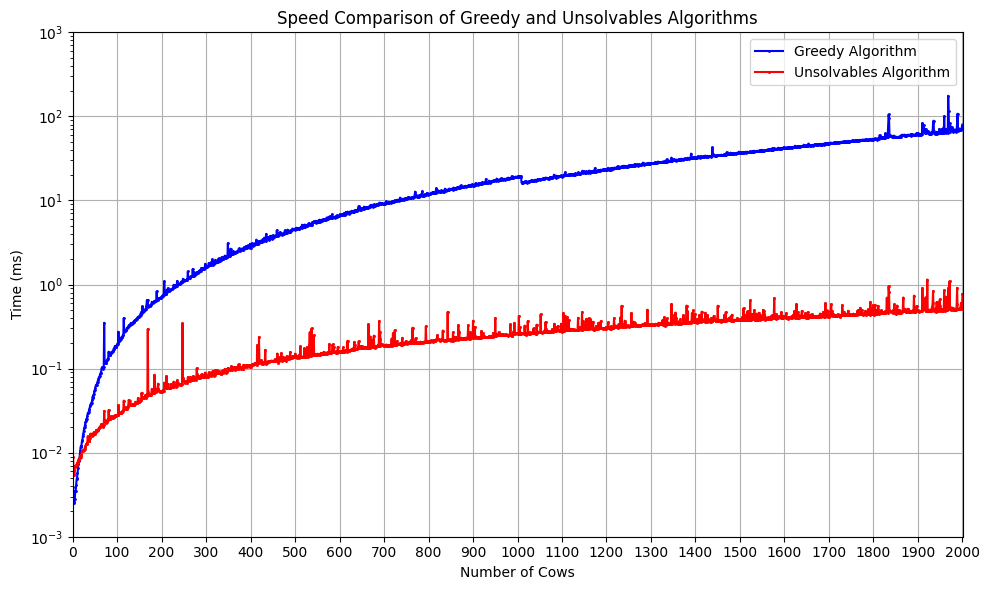

In [17]:
plt.figure(figsize=(10, 6))
num_cows = list(range(1, 2001))
plt.plot(num_cows, results_greedy, marker='o', markersize=1, label='Greedy Algorithm', color='blue')
plt.plot(num_cows, results_unsolvables, marker='s', markersize=1, label='Unsolvables Algorithm', color='red')
plt.xlabel('Number of Cows')
plt.xlabel('Number of Cows')
plt.ylabel('Time (ms)')
plt.title('Speed Comparison of Greedy and Unsolvables Algorithms')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 2001, 100))
plt.xlim(0, 2001)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylim(0.001, 1000)
plt.tight_layout()
plt.show()

As can be seen in the graph our algorithm sieves the data before processing(sorting) and as a result, it is not affected by the size of the data. Instead, Unsolvables uses memory space to store the cows before sorting.